In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

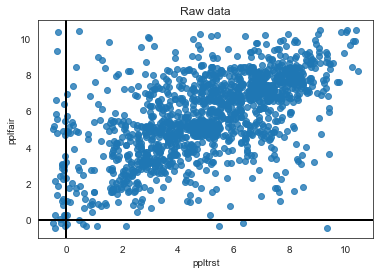

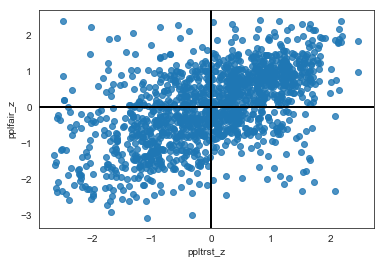

In [2]:
sns.set_style('white')
df = pd.read_csv('ESSdata_Thinkful.csv')
df_pca = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6), 
    ['tvtot', 'ppltrst', 'pplfair', 'pplhlp']
].dropna()

t = sns.regplot(
    'ppltrst', 'pplfair', df_pca, x_jitter=.49, y_jitter=.49, fit_reg=False
)
t.set(xlim=(-1,11),ylim=(-1,11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

df_pca['ppltrst_z'] = (df_pca['ppltrst'] - df_pca['ppltrst'].mean()) / df_pca['ppltrst'].std()
df_pca['pplfair_z'] = (df_pca['pplfair'] - df_pca['pplfair'].mean()) / df_pca['pplfair'].std()

t = sns.regplot(
    'ppltrst_z', 'pplfair_z', df_pca, x_jitter=.49, y_jitter=.49, fit_reg=False
)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
plt.show()

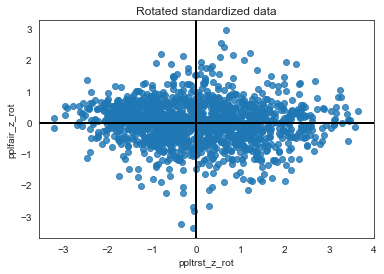

In [3]:
df_pca['ppltrst_z_rot'] = math.cos(40) * df_pca['ppltrst_z'] - math.sin(40) * df_pca['pplfair_z']
df_pca['pplfair_z_rot'] = math.sin(40) * df_pca['ppltrst_z'] + math.cos(40) * df_pca['pplfair_z']

t = sns.regplot(
    'ppltrst_z_rot', 'pplfair_z_rot', df_pca, x_jitter=.49, y_jitter=.49, fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

In [4]:
df_pca = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6), 
    ['tvtot', 'ppltrst', 'pplfair', 'pplhlp']
].dropna()
X = StandardScaler().fit_transform(df_pca)
print(X)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

[[-0.49458935 -0.88516387  1.93785595 -0.07223273]
 [ 0.91308803 -0.03390505  0.58209606 -0.07223273]
 [-1.43304094  1.24298319  1.03401602  1.28189023]
 ...
 [ 0.44386224 -2.1620521  -1.67750377 -2.32910434]
 [-0.02536356 -0.45953446 -0.77366384 -0.52360705]
 [ 0.44386224 -0.45953446 -0.77366384 -0.07223273]]
Covariance Matrix:
 [[ 1.00071174 -0.24535312 -0.23531159 -0.17820482]
 [-0.24535312  1.00071174  0.60528939  0.49609931]
 [-0.23531159  0.60528939  1.00071174  0.53193085]
 [-0.17820482  0.49609931  0.53193085  1.00071174]]


In [5]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
#print(len(eig_val_cov))
#print(eig_vec_cov)
#print(eig_val_cov)
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')
print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.30084526]
 [ 0.55945823]
 [ 0.5681188 ]
 [ 0.52320135]]
Eigenvalue 1: 2.211256863199824
----------------------------------------
Eigenvector 2: 
[[0.94786152]
 [0.11600843]
 [0.15403897]
 [0.25371751]]
Eigenvalue 2: 0.8847413570711684
----------------------------------------
Eigenvector 3: 
[[ 0.10491426]
 [ 0.51597659]
 [ 0.28505945]
 [-0.80093836]]
Eigenvalue 3: 0.5151421389236892
----------------------------------------
Eigenvector 4: 
[[ 0.00660771]
 [ 0.63821367]
 [-0.75647481]
 [ 0.14277786]]
Eigenvalue 4: 0.39170661589428624
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.55242103 0.22102802 0.12869394 0.097857  ]


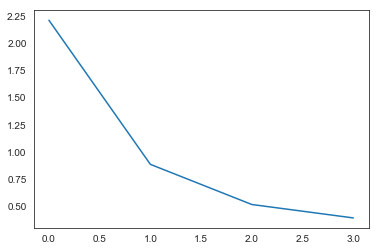

In [6]:
plt.plot(eig_val_cov)
plt.show()

[-0.30084526  0.55945823  0.5681188   0.52320135]
[[-0.30084526  0.94786152  0.10491426  0.00660771]
 [ 0.55945823  0.11600843  0.51597659  0.63821367]
 [ 0.5681188   0.15403897  0.28505945 -0.75647481]
 [ 0.52320135  0.25371751 -0.80093836  0.14277786]]
[ 7.16722786e-01 -7.59212912e-04  2.38465138e+00 ... -3.51472364e+00
 -9.62944714e-01 -8.67949418e-01]
      Component variable  value
0      0.716723    tvtot    3.0
1     -0.000759    tvtot    6.0
2      2.384651    tvtot    1.0
3      0.735266    tvtot    4.0
4      0.378527    tvtot    5.0
5      0.047372    tvtot    4.0
6     -1.989843    tvtot    3.0
7     -0.660031    tvtot    2.0
8      2.243487    tvtot    2.0
9     -0.018306    tvtot    4.0
10     1.415504    tvtot    1.0
11     0.753889    tvtot    4.0
12     0.521654    tvtot    4.0
13     0.597218    tvtot    2.0
14    -0.942360    tvtot    4.0
15    -0.611205    tvtot    5.0
16     0.753889    tvtot    4.0
17     1.512461    tvtot    2.0
18     2.507193    tvtot    0.0
19

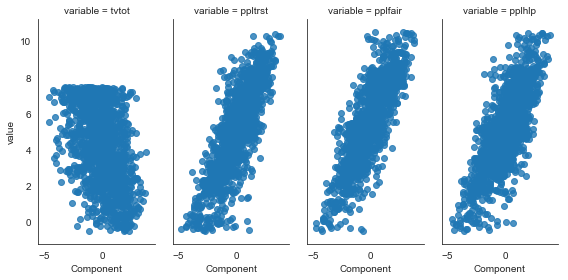

In [7]:
P = eig_vec_cov[:, 0]
print(P)
print(eig_vec_cov)

Y = P.T.dot(Xt)
print(Y)

data_to_plot = df_pca[['tvtot', 'ppltrst', 'pplfair', 'pplhlp']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')
print(data_to_plot)

g = sns.FacetGrid(data_to_plot, col='variable', height=4, aspect=.5)
g = g.map(
    sns.regplot,
    'Component',
    'value',
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.55242103 0.22102802 0.12869394 0.097857  ]


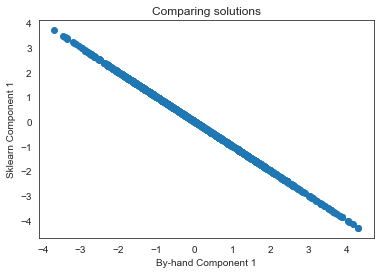

In [8]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

plt.plot(Y_sklearn[:,0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()